# Redwine

## Onderzoeksvragen

 1.	In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?
    1.	Toepassing van een supervised machine learning 
    2.	Correlatieonderzoek
    
2.	Kunnen we verschillende groepen vinden van de wijnen met een hoge score op base van de chemische samenstelling?
    1.	Toepassing van een unsupervised machine learning
    2.	Gebruik van externe dataset
    
3.	Wat is het verband tusen de ingredienten van de wijnen en de regio's?
    1.	Interactieve visualisatie
    2.	Toepassing van supervised learning.


## Data collection 

## Libraries importeren 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Datasets inlezen en verkennen 

In [3]:
# load dataset redwine.csv
df = pd.read_csv('redwine.csv',encoding  = "ansi", delimiter = ';')
df.head(10)


,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4
5,6,Portugal,This is a new wine from the hands of master wi...,Monte de Carrapatelo Colheita Seleccionada Tinto,92,30.0,Alentejano,Michael Schachner,Luis Duarte 2013 Monte de Carrapatelo Colheita...,Portuguese Red,...,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3
6,7,Portugal,As its name suggests this is a selection of ba...,Lagoalva Barrel Selection Tinto,92,23.0,Tejo,Kerin O’Keefe,Quinta da Lagoalva de Cima 2013 Lagoalva Barre...,Portuguese Red,...,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8
7,8,Portugal,"This is an impressive, powerful wine, It speak...",NaN,92,80.0,Douro,Roger Voss,Quinta do Monte Xisto 2013 Red (Douro),Portuguese Red,...,0.53,-,1.4,0.070,6.0,14.0,0.99593,3.25,0.64,10
8,9,Portugal,"Powerful and concentrated, this is just at its...",Grande Reserva,92,32.0,Alentejo,Anna Lee C. Iijima,Monte da Penha 2005 Grande Reserva Red (Alentejo),Portuguese Red,...,0.33,0.41,1.5,0.056,6.0,35.0,0.99396,3.29,0.71,11
9,10,Portugal,"This mature wine has a soft, smooth character ...",VT '08,90,32.0,Douro,Roger Voss,Quinta do Sagrado 2008 VT '08 Red (Douro),Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3


In [4]:
#load externe dataset 
externdf = pd.read_csv('wineQualityReds.csv', delimiter = ',')
externdf.head(10)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## Data analyse  

Er zal in de data redwine.csv de <i>features</i> word bekeken.Er wordt gezien of de <i>feautures</i> in de dataset compleet is en doig is voor het oplossen van de onderzoeksvragen 

In [11]:
df.shape # er zijn 2465 rijen en 22 kolommen

(2465, 22)

In [5]:
# Return een lijst van de features in de dataset
df.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [6]:
#Bekijk de waardes van de features.
df.head(5)

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


- Numerieke features:  
    - id
    - points 
    - price
    - fixed_acidity
    - volatile acidity
    - residual sugar
    - chlorides
    - free sulfur dioxide
    - total sulfur dioxide
    - pH 
    - sulphates
    - alcohol
- Characters (string) Features
    - country                  object - string
    - description              object - string
    - designation              object - string 
    - province                 object - string
    - taster_name              object - string
    - title                    object - string
    - variety                  object - string # moet verwijderd worden
    - winery                   object - string 
    
  

In [51]:
df['variety'].unique() # Er is te zien dat alle wijnen zij Portuguese Red, dus dit kolom kunnen we weglaten.
df['country'].unique() # Er is te zien dat alle wijnen zij Portugal, dus dit kolom kunnen we weglaten.

2465

In [9]:
# De datypes voor elke feature
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

All deze features bevat de datatype object, en moet de volgende datatypes hebben.
* features die we gaan gebruiken om onderzoeksvragen op te lossen.
country                  object - string
description              object - string
designation              object - string 
province                 object - string*
taster_name              object - string
title                    object - string
variety                  object - string 
winery                   object - string 
citric acid              object - float*
density                  object - float*
alcohol                  object - float*

In [122]:
# features veranderen ???
df['province'] = df['province'].astype(str)
#df['citric acid'] = pd.to_numeric(df['citric acid'])
#df['density'] = pd.to_numeric(df['density'])
#df['alcohol'] = pd.to_numeric(df['alcohol'])


In [123]:
df.dtypes

id                        int64
country                  object
description              object
designation              object
points                    int64
price                   float64
province                 object
taster_name              object
title                    object
variety                  object
winery                   object
fixed acidity           float64
volatile acidity        float64
citric acid              object
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                  object
pH                      float64
sulphates               float64
alcohol                  object
dtype: object

### Missend waardes

In [33]:
df.isnull().sum()

id                        0
country                   0
description               0
designation             153
points                    0
price                   269
province                  0
taster_name               0
title                     0
variety                   0
winery                    0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Variety bevat allen de waarde Portuguese Red , dus misschien kan dit kolom vewrijdert worden .
Designation en price bevatten vell none waardes en we gaan deze kolommen nietgebruiken om onze oderzoeksvragen op te lossen , dus deze kunnen ook verwijdert worden.

### Data exploration en analysis

### De aantal wijnen per regio bepalen

In [53]:
len(df['province']) # totaal aantala provincies in Portugal.

2465

In [65]:
#aantal wijnen per regio
df.groupby(df['province'].loc[df['points'] > 0]).count()['title']

province
Alenquer                   6
Alentejano               535
Alentejo                 126
Algarve                    8
Bairrada                  66
Beira Atlantico            3
Beira Interior            18
Beiras                     5
Douro                    880
Duriense                   5
Dão                      176
Estremadura               12
Lisboa                   228
Minho                      3
Obidos                     8
Palmela                    2
Península de Setúbal      44
Portugal                   1
Portuguese Table Wine      8
Ribatejano                11
Ribatejo                  10
Setubal                   13
Table wine                 1
Tejo                     274
Terras do Dão              4
Terras do Sado             4
Trás-os-Montes             8
Vinho Licoroso             1
Vinho Verde                4
Vinho da Mesa              1
Name: title, dtype: int64

In [118]:
# aantal unieke wijnen per regio bepalen
unieke_wijnen = list(df.groupby(df['province'].loc[df['points'] > 0]).count()['title'])
df['province'].unique()

[Douro, Alentejano, Alentejo, Beira Atlantico, Tejo, ..., Vinho da Mesa, Beiras, Algarve, Portugal, Vinho Licoroso]
Length: 30
Categories (30, object): [Douro, Alentejano, Alentejo, Beira Atlantico, ..., Beiras, Algarve, Portugal, Vinho Licoroso]

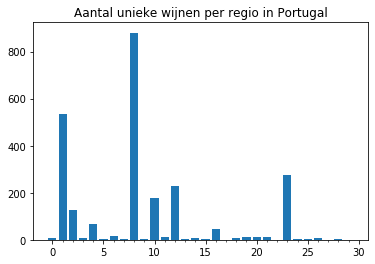

In [131]:
 #visualiseer in een staaf diagram
    
x = np.arange(len(df['province'].unique()))  # the label locations

ax = plt.subplot(111)
ax.bar(x, unieke_wijnen)

ax.set_title('Aantal unieke wijnen per regio in Portugal')
ax.set_xticks(x, df['province'].unique)
#ax.set_xticklabels(df['province'].unique)



plt.show()

Deze grafiek geeft de aantal unieke wijnen per regio. Elke bar geeft een provincie aan.
Hiermee kunnen we zien welke provincies kunne  we nemne als steekproef om onze onderzoeksvragen op te lossen.

Vraag: steekproef nemen ?? 

### Datasets koppelen 

In [135]:
print(df.columns)
print(externdf.columns)

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [139]:
externdf.dtypes

Unnamed: 0                int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [141]:
externdf.isnull().sum()

Unnamed: 0              0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
mergedf = pd.merge(df, externdf, how='outer', 
        left_on=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'], 
        right_on = ['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol'])

mergedf

Aanpak : 
De datatypes van beide datasets moet dezelfde zijn. 
We mergen op base van de soortgelijke kolommen van beide datasets.

Zodat we de twee datasets hebben gemerged, per chemische kenmerk een boxplot tekenen en als een groot verspreiding is , kunnen we best die chemische kenmerken om clustering toe te passen .

In [12]:
# minimum - maximum points
print("Mininum punten " + str(df['points'].min()))
print("Maximum punten " + str(df['points'].max()))
#gemiddelde van kolom points
print("Gemiddelde punten " + str(df['points'].mean()))

Mininum punten 81
Maximum punten 100
Gemiddelde punten 88.81135902636917


In [13]:
len(df[df['points'] > 88.81135902636917]) # er zijn 1217 rijen die boven de gemiddele scoren.

1217

In [14]:
#Kijk de aantal verschillende wijnen die boven de gemiddelde scoren
len(list(set(df['title'].loc[df['points'] > 88.81135902636917])))

1136

In [15]:
list(set(df['title'].loc[df['points'] > 88.81135902636917]))

['Quinta de la Rosa 2011 La Rosa Reserva Red (Douro)',
 'Burmester 2006 Red (Douro)',
 'Casca Wines 2010 Santos da Casa Grande Reserva Red (Alentejano)',
 'Cartuxa 2013 Tinto Reserva Red (Alentejo)',
 'Casa Santos Lima 2012 Confidencial Reserva Red (Lisboa)',
 'Quinta do Vallado 2006 Reserva Red (Douro)',
 'José Maria da Fonseca 2015 José de Sousa Red (Alentejano)',
 'Quinta das Bandeiras 2014 Passagem Red (Douro)',
 'Quinta da Maritávora 2009 Reserva Red (Douro)',
 'Ideal Drinks 2009 Principal Grande Reserva Red (Bairrada)',
 'Cartuxa 2005 Foral de Evora Red (Alentejano)',
 'Poças 2010 Reserva Red (Douro)',
 'Poças 2005 Vale de Cavalhos Red (Douro)',
 "Rui Roboredo Madeira 2014 Castello d'Alba Vinhas Velhas Red (Douro)",
 'Falua 2005 Conde de Vimioso Reserva Red (Ribatejano)',
 'Quinta da Lagoalva de Cima 2012 Dona Isabel Juliana Red (Tejo)',
 'Wines & Winemakers 2008 Azul Portugal Red (Bairrada)',
 'Caves Velhas 2008 Catedral Reserva Red (Dão)',
 'Quinta de Chocapalha 2011 Tinto Red 

In [16]:
df.groupby(df['province'].loc[df['points'] > 88.81135902636917]).count()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
province,,,,,,,,,,,,,,,,,,,,,
Alenquer,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Alentejano,230,230,230,213,230,204,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
Alentejo,69,69,69,66,69,62,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
Algarve,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bairrada,34,34,34,34,34,32,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
Beira Atlantico,3,3,3,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Beira Interior,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
Beiras,5,5,5,2,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Douro,536,536,536,490,536,475,536,536,536,536,...,536,536,536,536,536,536,536,536,536,536


In [ ]:

#df.groupby(df['province'].loc[df['title'].unique()]).count()

In [18]:
df.groupby(df['taster_name'].loc[df['points'] > 0]).mean()['points'] # nu zien we dat alle wijn experts ongeveer dezelfde scor heeft en daardoor unbiased zijn.

taster_name
Alexander Peartree    88.500000
Anna Lee C. Iijima    88.892857
Anne Krebiehl MW      88.090909
Carrie Dykes          85.333333
Fiona Adams           88.666667
Jeff Jenssen          87.111111
Jim Gordon            88.710280
Joe Czerwinski        88.650350
Kerin O’Keefe         88.740310
Lauren Buzzeo         88.552632
Matt Kettmann         89.057143
Michael Schachner     89.054688
Mike DeSimone         89.600000
Paul Gregutt          88.899083
Roger Voss            88.779365
Sean P. Sullivan      88.648000
Susan Kostrzewa       89.068966
Virginie Boone        88.845455
Name: points, dtype: float64

In [19]:
# de verschil van de gemiddelde ingredienten per provincie.
df.groupby('province')[['fixed acidity']].mean()

,fixed acidity
province,
Alenquer,8.333333
Alentejano,8.394766
Alentejo,8.106349
Algarve,8.400000
Bairrada,8.127273
Beira Atlantico,7.266667
Beira Interior,8.505556
Beiras,9.580000
Douro,8.381705


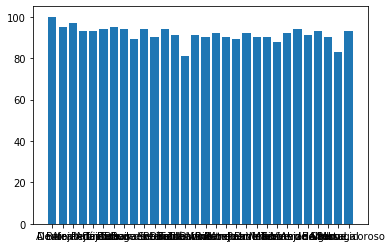

In [20]:
#Visualiseren in een barchart.
xb = df['province'] 
yb = df['points'] # klopt niet
plt.bar(xb,yb)
plt.show()